### Importing libraries to begin analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Looking for the most popular starting station for any trip. Appears as Caltrains are the 2 most popular, which can possibly imply those are trips taken by commuters.

In [3]:
%%bigquery start_station_df
select count(trip_id), start_station_name
from `bigquery-public-data.san_francisco.bikeshare_trips`
group by start_station_name
order by count(trip_id) desc
limit 10

Downloading: 100%|██████████| 10/10 [00:01<00:00,  7.70rows/s]


In [4]:
start_station_df

,f0_,start_station_name
0,72683,San Francisco Caltrain (Townsend at 4th)
1,56100,San Francisco Caltrain 2 (330 Townsend)
2,49062,Harry Bridges Plaza (Ferry Building)
3,41137,Embarcadero at Sansome
4,39936,2nd at Townsend
5,39200,Temporary Transbay Terminal (Howard at Beale)
6,38531,Steuart at Market
7,35142,Market at Sansome
8,34894,Townsend at 7th
9,30209,Market at 10th


### Looking at the trips where starting stations and ending stations are different.

In [5]:
%%bigquery diff_end_station_df

select count(trip_id), start_station_name, end_station_name
from `bigquery-public-data.san_francisco.bikeshare_trips`
where start_station_name != end_station_name
group by start_station_name, end_station_name
order by count(trip_id) desc
limit 10

Downloading: 100%|██████████| 10/10 [00:01<00:00,  7.77rows/s]


In [6]:
diff_end_station_df

,f0_,start_station_name,end_station_name
0,9150,Harry Bridges Plaza (Ferry Building),Embarcadero at Sansome
1,8508,San Francisco Caltrain 2 (330 Townsend),Townsend at 7th
2,7620,2nd at Townsend,Harry Bridges Plaza (Ferry Building)
3,6888,Harry Bridges Plaza (Ferry Building),2nd at Townsend
4,6874,Embarcadero at Sansome,Steuart at Market
5,6836,Townsend at 7th,San Francisco Caltrain 2 (330 Townsend)
6,6351,Embarcadero at Folsom,San Francisco Caltrain (Townsend at 4th)
7,6215,San Francisco Caltrain (Townsend at 4th),Harry Bridges Plaza (Ferry Building)
8,6039,Steuart at Market,2nd at Townsend
9,5959,Steuart at Market,San Francisco Caltrain (Townsend at 4th)


### Looking at the trips where starting stations and ending stations are the same.

In [7]:
%%bigquery same_end_station_df

select count(trip_id), start_station_name, end_station_name
from `bigquery-public-data.san_francisco.bikeshare_trips`
where start_station_name = end_station_name
group by start_station_name, end_station_name
order by count(trip_id) desc
limit 10

Downloading: 100%|██████████| 10/10 [00:01<00:00,  7.14rows/s]


In [8]:
same_end_station_df

,f0_,start_station_name,end_station_name
0,2866,Embarcadero at Sansome,Embarcadero at Sansome
1,2364,Harry Bridges Plaza (Ferry Building),Harry Bridges Plaza (Ferry Building)
2,1184,University and Emerson,University and Emerson
3,944,Market at 4th,Market at 4th
4,911,Steuart at Market,Steuart at Market
5,895,2nd at Townsend,2nd at Townsend
6,843,Market at 10th,Market at 10th
7,840,Embarcadero at Vallejo,Embarcadero at Vallejo
8,827,Davis at Jackson,Davis at Jackson
9,822,Powell at Post (Union Square),Powell at Post (Union Square)


### Checking if subscribers take more trips than customers. Turns out they do, about 86% trips are from subsribers.

In [9]:
%%bigquery sub_df  
SELECT count (distinct trip_ID), subscriber_type FROM `bigquery-public-data`.san_francisco.bikeshare_trips
Group BY subscriber_type

Downloading: 100%|██████████| 2/2 [00:01<00:00,  1.45rows/s]


In [10]:
sub_df

,f0_,subscriber_type
0,136809,Customer
1,846839,Subscriber


In [13]:
customer_perc=(136809/(136809+846839))*100
customer_perc

13.908328995738312

In [14]:
sub_perc=(846839/(136809+846839))*100
sub_perc

86.09167100426168

### Looking at trips where start and end stations are different by subscriber type.

In [15]:
%%bigquery diff_end_station_df_sub

select count(trip_id), start_station_name, end_station_name, subscriber_type
from `bigquery-public-data.san_francisco.bikeshare_trips`
where start_station_name != end_station_name
group by start_station_name, end_station_name, subscriber_type
order by count(trip_id) desc
limit 10

Downloading: 100%|██████████| 10/10 [00:02<00:00,  4.76rows/s]


In [62]:
diff_end_station_df_sub

,f0_,start_station_name,end_station_name,subscriber_type
0,8305,San Francisco Caltrain 2 (330 Townsend),Townsend at 7th,Subscriber
1,6931,2nd at Townsend,Harry Bridges Plaza (Ferry Building),Subscriber
2,6641,Townsend at 7th,San Francisco Caltrain 2 (330 Townsend),Subscriber
3,6332,Harry Bridges Plaza (Ferry Building),2nd at Townsend,Subscriber
4,6200,Embarcadero at Sansome,Steuart at Market,Subscriber
5,6158,Embarcadero at Folsom,San Francisco Caltrain (Townsend at 4th),Subscriber
6,5758,Steuart at Market,2nd at Townsend,Subscriber
7,5709,San Francisco Caltrain (Townsend at 4th),Harry Bridges Plaza (Ferry Building),Subscriber
8,5699,Temporary Transbay Terminal (Howard at Beale),San Francisco Caltrain (Townsend at 4th),Subscriber
9,5695,Steuart at Market,San Francisco Caltrain (Townsend at 4th),Subscriber


### Looking at trips where start and end stations are the same by subscriber type.

In [16]:
%%bigquery same_end_station_df_sub

select count(trip_id), start_station_name, end_station_name, subscriber_type
from `bigquery-public-data.san_francisco.bikeshare_trips`
where start_station_name = end_station_name
group by start_station_name, end_station_name, subscriber_type
order by count(trip_id) desc
limit 10

Downloading: 100%|██████████| 10/10 [00:01<00:00,  6.58rows/s]


In [17]:
same_end_station_df_sub

,f0_,start_station_name,end_station_name,subscriber_type
0,2545,Embarcadero at Sansome,Embarcadero at Sansome,Customer
1,2004,Harry Bridges Plaza (Ferry Building),Harry Bridges Plaza (Ferry Building),Customer
2,1113,University and Emerson,University and Emerson,Customer
3,811,Market at 4th,Market at 4th,Customer
4,769,Powell at Post (Union Square),Powell at Post (Union Square),Customer
5,703,Embarcadero at Vallejo,Embarcadero at Vallejo,Customer
6,645,Powell Street BART,Powell Street BART,Customer
7,630,Steuart at Market,Steuart at Market,Customer
8,531,Market at 10th,Market at 10th,Customer
9,529,Davis at Jackson,Davis at Jackson,Subscriber


### Does trip duration differ from customer to subscriber?

In [18]:
%%bigquery sub_trip_time             
select  avg(duration_sec/60) , subscriber_type
from `bigquery-public-data`.san_francisco.bikeshare_trips
group by subscriber_type 

Downloading: 100%|██████████| 2/2 [00:01<00:00,  1.06rows/s]


In [19]:
sub_trip_time

,f0_,subscriber_type
0,61.979753,Customer
1,9.712737,Subscriber


### Seems like there are more trips occuring among subscribers than customers. Additionally, Customers take longer trips where as subscribers take shorter ones. 

### Looking at how trips taken overall differ across the year. Appears as peak usage is between June-October, which then begins to decrease. This maybe due to weather or vacation time/holiday season.

In [54]:
%%bigquery trips_per_month_df   
select count(trip_id),
EXTRACT(month from start_date) as trip_month,
count(*) as trips
FROM `bigquery-public-data`.san_francisco.bikeshare_trips
group by trip_month
order by trip_month

Downloading: 100%|██████████| 12/12 [00:01<00:00,  9.32rows/s]


<AxesSubplot:xlabel='trip_month'>

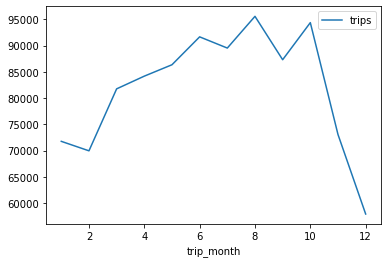

In [55]:
trips_per_month_df.plot(x="trip_month", y="trips")

### Looking at monthly trips by subscriber vs customer.

In [21]:
%%bigquery trips_per_month_sub_df   
select count(trip_id), subscriber_type,
EXTRACT(month from start_date) as trip_month,
count(*) as trips
FROM `bigquery-public-data`.san_francisco.bikeshare_trips
group by trip_month, subscriber_type
order by trip_month;

Downloading: 100%|██████████| 24/24 [00:01<00:00, 14.96rows/s]


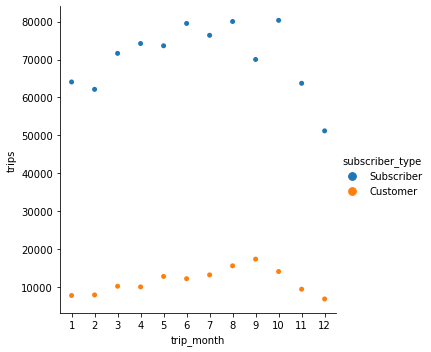

In [22]:
sns.catplot(x="trip_month", y="trips", hue="subscriber_type", kind="swarm", data=trips_per_month_sub_df)

Overall, trips are more frequent during the summertime (June-October). Trips do decrease by end of the year. When looking at it by subscriber type, the same pattern does seem to follow. However, customers generally take less trips than subscribers do.

### Looking at trips by the hour in one day.

In [218]:
%%bigquery trips_hour  
select avg(trip_id),
EXTRACT(hour from start_date) as trip_hour,
count(*) as trips
FROM `bigquery-public-data`.san_francisco.bikeshare_trips
group by trip_hour
order by trip_hour

Downloading: 100%|██████████| 24/24 [00:02<00:00, 11.43rows/s]


<AxesSubplot:title={'center':'Average Trips per Hour in a Day'}, xlabel='trip_hour'>

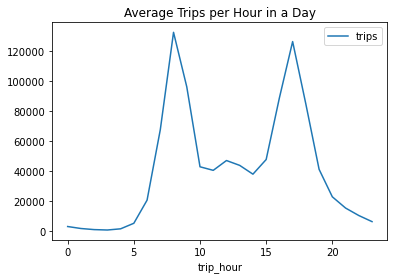

In [219]:
trips_hour.plot(x="trip_hour", y="trips", title="Average Trips per Hour in a Day")


### Looking at overall trips trhoughout the day, the peaks happen around 7-9am and after 3pm, which indicate rush hour. There are fewer trips that occur in the early morning from 1am-5am and after 8pm. 

In [222]:
%%bigquery trips_hour_sub
select avg(trip_id), subscriber_type,
EXTRACT(hour from start_date) as trip_hour,
count(*) as trips
FROM `bigquery-public-data`.san_francisco.bikeshare_trips
group by trip_hour, subscriber_type
order by trip_hour

Downloading: 100%|██████████| 48/48 [00:01<00:00, 35.22rows/s]


<AxesSubplot:xlabel='trip_hour', ylabel='trips'>

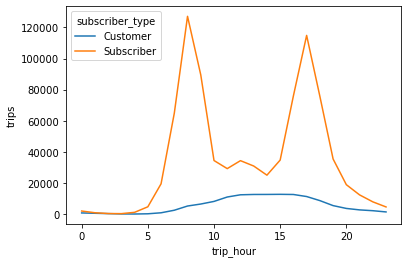

In [230]:
#trips_hour_sub
sns.lineplot(x="trip_hour", y="trips", hue="subscriber_type",data=trips_hour_sub)


### The peaks of most trips that were seen overall are also prominent within subscribers. They must be the majority of the commmuter users. However, when looking at the customer usage, there seems to be almost a normal curve with its max users around 12-1pm.

## Now that I explored overall trips, I will dig in to the trips that happen during rush hour, as that may indicate a commuter trip. I will define a rush hour trip as any trip from M-F between hours of 7-9am and 4-7pm.

In [183]:
%%bigquery rush_hour_df
select
(EXTRACT (Hour from start_date) >=7 AND extract(hour from end_date) <=9) OR Extract(hour from start_date) >= 16 or extract(hour from end_date)<=19 AND EXTRACT(DAYOFWEEK from start_date) IN (2, 3, 4, 5, 6) AND EXTRACT(DAYOFWEEK from end_date) IN (2, 3, 4, 5, 6) as rush_hour, 
count(*) as trips
FROM `bigquery-public-data`.san_francisco.bikeshare_trips
group by rush_hour;

Downloading: 100%|██████████| 2/2 [00:01<00:00,  1.04rows/s]


In [184]:
rush_hour_df

,rush_hour,trips
0,True,917974
1,False,65674


### Based on above, there seems to be more trips do happen during rush hour. Curious to see how this trend will be for trips during rush hour and when starting and ending stations are different, which can define a commuter trip.

In [187]:
%%bigquery commuter_trip_df
select
(EXTRACT (Hour from start_date) >=7 AND extract(hour from end_date) <=9) OR Extract(hour from start_date) >= 16 or extract(hour from end_date)<=19 AND EXTRACT(DAYOFWEEK from start_date) IN (2, 3, 4, 5, 6) AND EXTRACT(DAYOFWEEK from end_date) IN (2, 3, 4, 5, 6) as commuter_trip, 
count(*) as num_trips
FROM `bigquery-public-data`.san_francisco.bikeshare_trips
Where start_station_name != end_station_name
group by commuter_trip;

Downloading: 100%|██████████| 2/2 [00:02<00:00,  1.19s/rows]


In [188]:
commuter_trip_df

,commuter_trip,num_trips
0,False,57298
1,True,894303


In [23]:
commuter_trip=(894303/(57298+894303))*100
commuter_trip

93.97877892099736

### Based on above, there is more commuter trips (94%) than non-commuter trips.

### The monthly usage for a commuter trip follows the same pattern as a general trip. Peak around summer and decrease after October.

In [24]:
%%bigquery commuter_trips_df
select 
Extract (month from start_date) as trip_month,
Count(*) as trips
FROM `bigquery-public-data`.san_francisco.bikeshare_trips
Where (EXTRACT (Hour from start_date) >=7 AND extract(hour from end_date) <=9) OR (Extract(hour from start_date) >= 16 and extract(hour from end_date)<=19) AND (EXTRACT(DAYOFWEEK FROM start_date) IN (2, 3, 4, 5, 6)) and (EXTRACT(DAYOFWEEK from end_date) IN (2, 3, 4, 5, 6)) and (EXTRACT(DAYOFWEEK from end_date) IN (2, 3, 4, 5, 6)) and (start_station_name!=end_station_name) 
group by trip_month
order by trips desc;

Downloading: 100%|██████████| 12/12 [00:01<00:00,  8.15rows/s]


<AxesSubplot:xlabel='trip_month', ylabel='trips'>

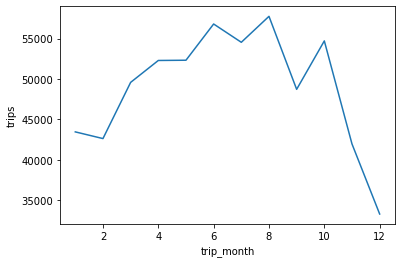

In [25]:
#commuter_trips_df
sns.lineplot(x="trip_month", y="trips",data=commuter_trips_df)


### How long is a commuter trip versus a non-commuter trip?

In [26]:
%%bigquery commuter_trips_df
select avg(duration_sec/60),
     (EXTRACT (Hour from start_date) >=7 AND extract(hour from end_date) <=9) OR Extract(hour from start_date) >= 16 or extract(hour from end_date)<=19 AND EXTRACT(DAYOFWEEK from start_date) IN (2, 3, 4, 5, 6) And EXTRACT(DAYOFWEEK from end_date) IN (2, 3, 4, 5, 6)as commuter_trip, 
        count(*) as num_trips
FROM `bigquery-public-data`.san_francisco.bikeshare_trips
Where start_station_name != end_station_name
group by commuter_trip;

Downloading: 100%|██████████| 2/2 [00:02<00:00,  1.14s/rows]


In [27]:
commuter_trips_df

,f0_,commuter_trip,num_trips
0,37.315086,False,57298
1,12.739512,True,894303


### Commuter trips overall are about 13 minutes long versus 37 minutes for non-commuter.

In [28]:
%%bigquery commuter_trips_df
select avg(duration_sec/60),start_station_name, end_station_name, subscriber_type,
Count(*) as trips
FROM `bigquery-public-data`.san_francisco.bikeshare_trips
Where (EXTRACT (Hour from start_date) >=7 AND extract(hour from end_date) <=9) OR (Extract(hour from start_date) >= 16 and extract(hour from end_date)<=19) AND (EXTRACT(DAYOFWEEK FROM start_date) IN (2, 3, 4, 5, 6)) and (EXTRACT(DAYOFWEEK from end_date) IN (2, 3, 4, 5, 6)) and (EXTRACT(DAYOFWEEK from end_date) IN (2, 3, 4, 5, 6)) and (start_station_name!=end_station_name) 
group by start_station_name, end_station_name, subscriber_type
order by trips desc;

Downloading: 100%|██████████| 3666/3666 [00:01<00:00, 3399.28rows/s]


In [29]:
commuter_trips_df.head()

,f0_,start_station_name,end_station_name,subscriber_type,trips
0,4.461407,San Francisco Caltrain 2 (330 Townsend),Townsend at 7th,Subscriber,5472
1,8.437533,2nd at Townsend,Harry Bridges Plaza (Ferry Building),Subscriber,5147
2,9.556311,Harry Bridges Plaza (Ferry Building),2nd at Townsend,Subscriber,5028
3,6.499308,Embarcadero at Sansome,Steuart at Market,Subscriber,4913
4,10.718405,Embarcadero at Folsom,San Francisco Caltrain (Townsend at 4th),Subscriber,4775


In [31]:
%%bigquery trips_by_day_s
select 
Extract (dayofweek from start_date) as trip_day,
Count(*) as trips
FROM `bigquery-public-data`.san_francisco.bikeshare_trips
Where subscriber_type='Subscriber'
group by trip_day
order by trips desc;

Downloading: 100%|██████████| 7/7 [00:01<00:00,  5.70rows/s]


Text(0.5, 1.0, 'Subscriber Trips in the Week')

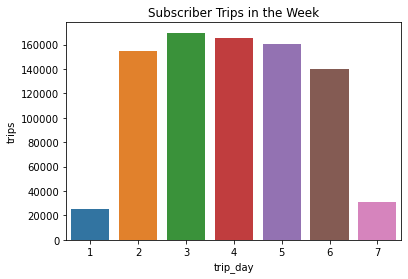

In [32]:
#trips_by_day
sns.barplot(x = 'trip_day', y = 'trips', data = trips_by_day_s)
plt.title("Subscriber Trips in the Week")
 

In [33]:
%%bigquery trips_by_day_c
select 
Extract (dayofweek from start_date) as trip_day,
Count(*) as trips
FROM `bigquery-public-data`.san_francisco.bikeshare_trips
Where subscriber_type='Customer'
group by trip_day
order by trips desc;

Downloading: 100%|██████████| 7/7 [00:01<00:00,  5.99rows/s]


Text(0.5, 1.0, 'Customer Trips in the Week')

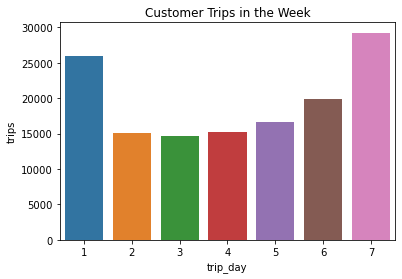

In [285]:
#trips_by_day
sns.barplot(x = 'trip_day', y = 'trips', data = trips_by_day_c)
plt.title("Customer Trips in the Week")

### Based on the daily trips taken by subscribers, there seems to be an interesting pattern. While subscribers take more trips during the week, customers take more on the weekends.

In [35]:
%%bigquery docks_by_station
select name, dockcount
FROM `bigquery-public-data`.san_francisco.bikeshare_stations
group by name, dockcount
order by dockcount desc
limit 5;

Downloading: 100%|██████████| 5/5 [00:01<00:00,  4.14rows/s]


Text(0.5, 1.0, 'Top 5 Docking Stations')

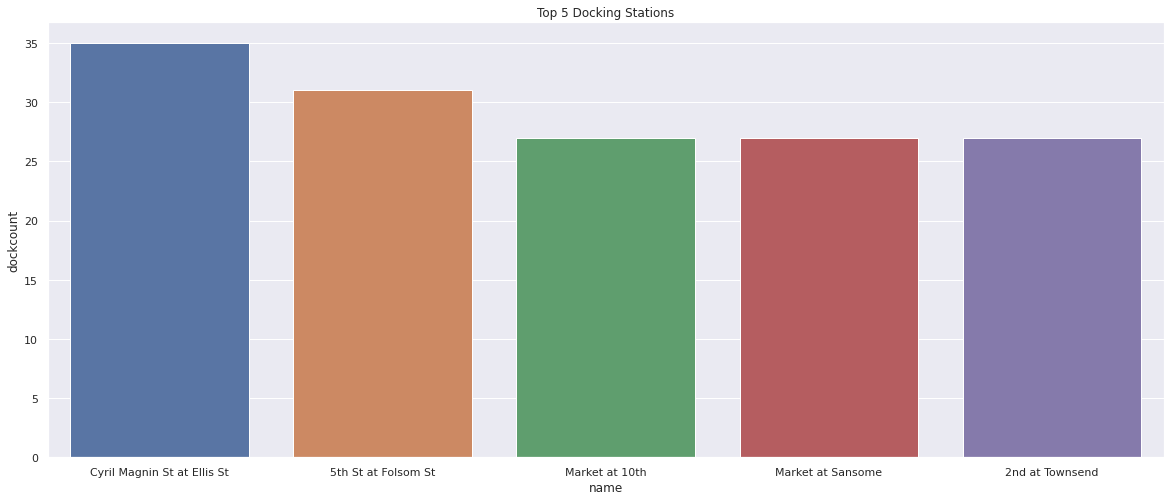

In [38]:
#docks_by_station.bar(name, dockcount)
#fig_dims = (30, 4)
#fig, ax = plt.subplots(figsize=fig_dims)
sns.set(rc = {'figure.figsize':(20,8)})
sns.barplot(x = 'name', y = 'dockcount',data = docks_by_station)
plt.title("Top 5 Docking Stations")
 

### The above chart shows the top 5 locations with the most docking stations. Interesting to note that not all top 5 commuter trip stations are on here. 


In [46]:
%%bigquery docks_by_station
select name, dockcount
FROM `bigquery-public-data`.san_francisco.bikeshare_stations
where name like '%train%'
group by name, dockcount
order by dockcount desc;

Downloading: 100%|██████████| 8/8 [00:01<00:00,  5.67rows/s]


In [47]:
docks_by_station

,name,dockcount
0,San Jose Diridon Caltrain Station,27
1,Redwood City Caltrain Station,25
2,Palo Alto Caltrain Station,23
3,San Antonio Caltrain Station,23
4,Mountain View Caltrain Station,23
5,San Francisco Caltrain 2 (330 Townsend),23
6,San Francisco Caltrain (Townsend at 4th),19
7,California Ave Caltrain Station,15


### Additionally, the train sessions being the most popular, have relatively less docks than the other locations.

I defined a commuter trip as follows:

a) A trip taken during rush hour- between hours of 7-9am and 4-7pm from Monday-Friday. 

b) A trip where the starting station and ending stations are different.
 

## 5 most popular trips that are commuter trips:
    
1. From San Francisco Caltrain 2 (330 Townsend) to Townsend at 7th : 5472 trips
2. From 2nd at Townsend to Harry Bridges Plaza (Ferry Building): 5147 trips
3. From Harry Bridges Plaza (Ferry Building) to 2nd at Townsend: 5028 trips
4. From Embarcadero at Sansome to Steuart at Market: 4913 trip
5. From Embarcadero at Folsom to San Francisco Caltrain (Townsend at 4th): 4775 trips

Additionally, all these were from subscriber accounts versus customer, with all less than 10 minutes of travel time.

## Recommendations:
    
   1. Since overall, less trips take place from September on, one recommendation is to offer a discount for single trips. Consider offering a free ride for every 20 rides or so, this may persuade people to take more rides on these months and will also help to increase revenue.
    
   2. Based on the analysis, majority of the commuters are subscribers. Keeping the current subscription service is a good idea especially since 45 minutes is included in the membership and on average these subscribers have a 10min commute time.  On the flip side, since customers don't use it as much, offering the discount or free ride incentive as mentioned in #1, may convince them to subscribe.
    
   3. There may also be opportunity to offer special rate for users who take trips early morning or late evening, which from above analysis shows the where the dip in trips occur. Something like an early bird special or a red eye discount may attract users and spread out the "business" during rush hour.
    
   4. Since customers are utilizing the bikes less than subscribers and because they use it more on the weekend, there may be an opportunity to offer weekend promotions to gain even more traction among customers.
    
   5. I will also recommend adding more docking stations in the areas that have the most traffic. As menioned above, not all top 5 commuter trip stations necessarily have the most docking stations. The SF caltrain is the most popular starting station yet has fewer docks available. Increasing docking stations in heavy traffic locations can allow more users to take advantage of the bikes, which can open doors for more customers to sign up. 
